# Linear regression

Notebook to look at forecasts made using linear regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from linear_regression import get_feature
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

In [2]:
from linear_regression import backtest

In [3]:
ds_begin = datetime(2021, 7, 1)
ds_end = datetime(2023, 5, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

In [4]:
errors = []

## Predictions using sales

### Predictions when removing the seasonality

In [5]:
error = pd.read_csv('linear_regression/sales_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000026  0.005124  0.004202  0.832612  0.749712
1           1   -2  0.000030  0.005455  0.004572  0.943294  0.716342
2           2   -3  0.000043  0.006593  0.005290  1.101984  0.585620
3           3   -4  0.000053  0.007264  0.005936  1.613594  0.496993
4           4   -5  0.000060  0.007729  0.006502  1.969173  0.430560
5           5   -6  0.000068  0.008254  0.006847  2.291585  0.350542


We get the best results for lag 1. Let us plot the predictions.

In [6]:
(y, y_hat) = backtest('sales_raw', 1, ds_begin, ds_end, 36, True)

Text(0.5, 1.0, 'Seasonally adjusted sales')

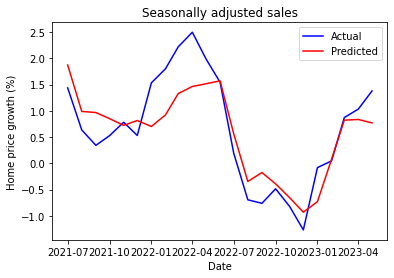

In [7]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted sales')

In [8]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA sales'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [9]:
error = pd.read_csv('linear_regression/sales_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000113  0.010626  0.009084  1.490995 -0.076434
1           1   -2  0.000124  0.011128  0.009381  2.368494 -0.180494
2           2   -3  0.000127  0.011278  0.008994  2.746699 -0.212706
3           3   -4  0.000129  0.011349  0.008882  2.708216 -0.227835
4           4   -5  0.000130  0.011390  0.009305  2.518680 -0.236890
5           5   -6  0.000131  0.011459  0.009800  2.401504 -0.251846


We get the best results for lag 1. Let us plot the predictions.

In [10]:
(y, y_hat) = backtest('sales_raw', 1, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non-seasonally adjusted sales')

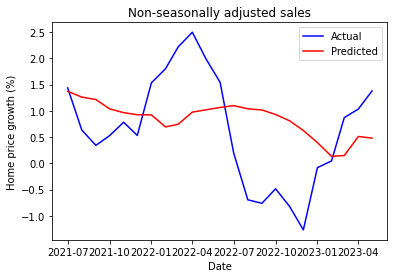

In [11]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non-seasonally adjusted sales')

In [12]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA sales'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using inventory

### Predictions when removing the seasonality

In [13]:
error = pd.read_csv('linear_regression/inventory_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000081  0.009006  0.007722  2.759655  0.226719
1           1   -2  0.000085  0.009214  0.007992  2.784637  0.190586
2           2   -3  0.000089  0.009435  0.008273  2.825346  0.151409
3           3   -4  0.000090  0.009511  0.008433  2.806207  0.137554
4           4   -5  0.000091  0.009517  0.008486  2.761562  0.136571
5           5   -6  0.000088  0.009389  0.008319  2.726777  0.159675


We get the best results for lag 1. Let us plot the predictions.

In [14]:
(y, y_hat) = backtest('inventory_raw', 1, ds_begin, ds_end, 36, True)

Text(0.5, 1.0, 'Seasonally adjusted inventory')

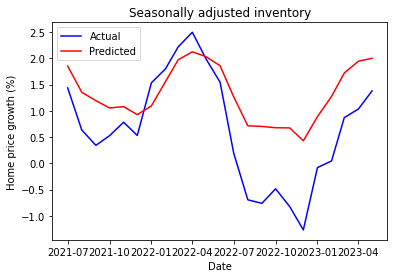

In [15]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted inventory')

In [16]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA inventory'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [17]:
error = pd.read_csv('linear_regression/inventory_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000116  0.010776  0.008576  3.021635 -0.106994
1           1   -2  0.000116  0.010753  0.008541  3.124485 -0.102248
2           2   -3  0.000126  0.011229  0.008977  2.935131 -0.201989
3           3   -4  0.000143  0.011940  0.009717  2.884875 -0.359214
4           4   -5  0.000158  0.012579  0.010513  3.026038 -0.508447
5           5   -6  0.000155  0.012445  0.010686  3.135590 -0.476558


We get the best results for lag 2. Let us plot the predictions.

In [18]:
(y, y_hat) = backtest('inventory_raw', 2, ds_begin, ds_end, 36,False)

Text(0.5, 1.0, 'Non seasonally adjusted inventory')

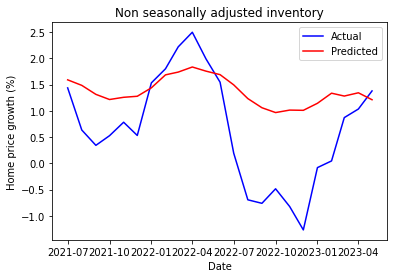

In [19]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted inventory')

In [20]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA inventory'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using new listings

### Predictions when removing the seasonality

In [21]:
error = pd.read_csv('linear_regression/new_listings_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000044  0.006615  0.005478  1.104866  0.582823
1           1   -2  0.000054  0.007340  0.006182  1.643469  0.486324
2           2   -3  0.000074  0.008580  0.007134  2.388801  0.298193
3           3   -4  0.000081  0.009009  0.007530  2.760915  0.226217
4           4   -5  0.000085  0.009195  0.007556  2.876559  0.193985
5           5   -6  0.000083  0.009090  0.007439  2.734923  0.212337


We get the best results for lag 1. Let us plot the predictions.

In [22]:
(y, y_hat) = backtest('new_listings_raw', 1, ds_begin, ds_end, 36, True)

Text(0.5, 1.0, 'Seasonally adjusted new listings')

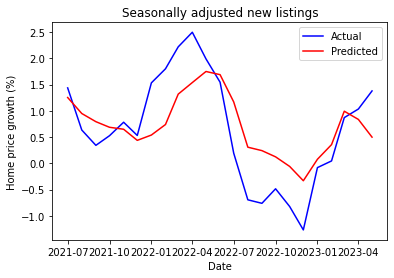

In [23]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted new listings')

In [24]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA new listings'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [25]:
error = pd.read_csv('linear_regression/new_listings_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000117  0.010839  0.009021  1.825285 -0.120104
1           1   -2  0.000130  0.011411  0.009530  3.023251 -0.241294
2           2   -3  0.000120  0.010975  0.008867  3.519426 -0.148384
3           3   -4  0.000109  0.010460  0.008644  3.179455 -0.042998
4           4   -5  0.000109  0.010440  0.008674  2.807908 -0.039057
5           5   -6  0.000125  0.011179  0.008945  2.467894 -0.191403


We get the best results for lag 5. Let us plot the predictions.

In [26]:
(y, y_hat) = backtest('new_listings_raw', 5, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non seasonally adjusted new listings')

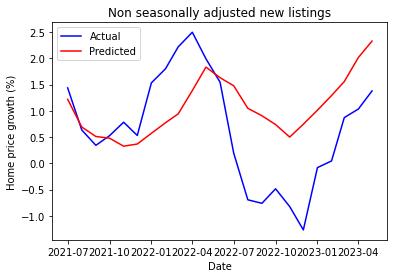

In [27]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted new listings')

In [28]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA new listings'], 'lag': [5], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using mean days to pending

### Predictions when removing the seasonality

In [29]:
error = pd.read_csv('linear_regression/mean_days_to_pending_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000082  0.009049  0.007958  2.582381  0.219348
1           1   -2  0.000089  0.009409  0.008311  2.763478  0.156051
2           2   -3  0.000093  0.009661  0.008597  2.875112  0.110176
3           3   -4  0.000095  0.009761  0.008744  2.917123  0.091635
4           4   -5  0.000094  0.009719  0.008765  2.883272  0.099444
5           5   -6  0.000091  0.009542  0.008546  2.749796  0.131967


We get the best results for lag 1. Let us plot the predictions.

In [30]:
(y, y_hat) = backtest('mean_days_to_pending_raw', 1, ds_begin, ds_end, 36, True)

Text(0.5, 1.0, 'Seasonally adjusted mean days to pending')

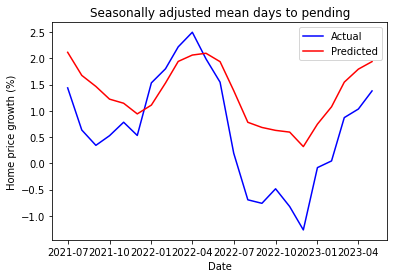

In [31]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted mean days to pending')

In [32]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA mean days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [33]:
error = pd.read_csv('linear_regression/mean_days_to_pending_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000143  0.011974  0.010132  2.662401 -0.366861
1           1   -2  0.000143  0.011958  0.010067  2.998824 -0.363259
2           2   -3  0.000133  0.011533  0.009764  2.861034 -0.268028
3           3   -4  0.000123  0.011093  0.009624  2.651982 -0.173050
4           4   -5  0.000117  0.010798  0.009101  2.456948 -0.111629
5           5   -6  0.000121  0.010978  0.009061  2.311342 -0.149043


We get the best results for lag 1. Let us plot the predictions.

In [34]:
(y, y_hat) = backtest('mean_days_to_pending_raw', 1, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non seasonally adjusted mean days to pending')

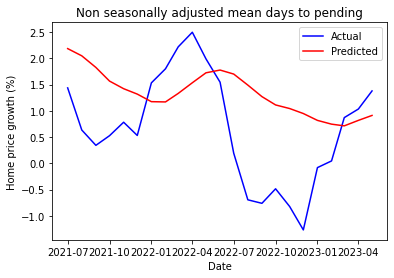

In [35]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted mean days to pending')

In [36]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA mean days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using mean sale-to-list ratio

### Predictions when removing the seasonality

In [37]:
error = pd.read_csv('linear_regression/mean_sale_to_list_ratio_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000070  0.008396  0.007365  2.174491  0.328030
1           1   -2  0.000090  0.009504  0.008487  2.630814  0.138884
2           2   -3  0.000103  0.010144  0.009075  2.961165  0.018905
3           3   -4  0.000107  0.010345  0.009314  3.159054 -0.020274
4           4   -5  0.000105  0.010255  0.009285  3.219412 -0.002601
5           5   -6  0.000100  0.010005  0.009091  3.090139  0.045725


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [38]:
(y, y_hat) = backtest('mean_sale_to_list_ratio_raw', 2, ds_begin, ds_end, 36, True)

Text(0.5, 1.0, 'Seasonally adjusted mean sale-to-list ratio')

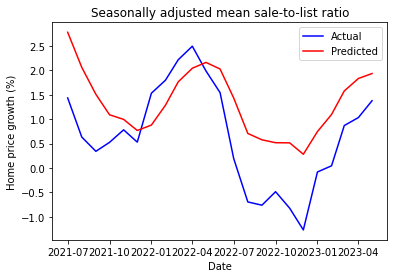

In [39]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted mean sale-to-list ratio')

In [40]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA mean sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [41]:
error = pd.read_csv('linear_regression/mean_sale_to_list_ratio_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000133  0.011533  0.009940  2.030793 -0.267968
1           1   -2  0.000162  0.012732  0.010938  2.864706 -0.545332
2           2   -3  0.000162  0.012742  0.010999  3.318241 -0.547915
3           3   -4  0.000146  0.012073  0.010654  3.425033 -0.389475
4           4   -5  0.000129  0.011348  0.010081  3.233754 -0.227596
5           5   -6  0.000123  0.011073  0.009761  2.801441 -0.168909


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [42]:
(y, y_hat) = backtest('mean_sale_to_list_ratio_raw', 2, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non seasonally adjusted mean sale-to-list ratio')

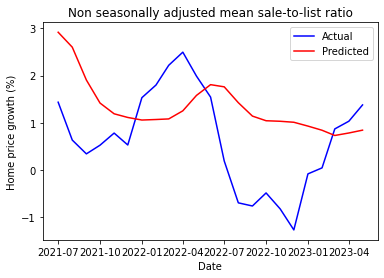

In [43]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted mean sale-to-list ratio')

In [44]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA mean sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using median days to pending

### Predictions when removing the seasonality

In [45]:
error = pd.read_csv('linear_regression/median_days_to_pending_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000048  0.006956  0.005617  1.037030  0.538765
1           1   -2  0.000055  0.007394  0.006006  1.459157  0.478860
2           2   -3  0.000064  0.008001  0.006567  2.225409  0.389756
3           3   -4  0.000078  0.008811  0.007438  2.719261  0.259918
4           4   -5  0.000090  0.009472  0.008238  3.076188  0.144751
5           5   -6  0.000099  0.009930  0.008757  3.279473  0.059861


We get the best results for lag 1. Let us plot the predictions.

In [46]:
(y, y_hat) = backtest('median_days_to_pending_raw', 1, ds_begin, ds_end, 36, True)

Text(0.5, 1.0, 'Seasonally adjusted median days to pending')

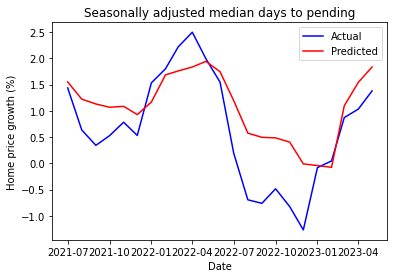

In [47]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted median days to pending')

In [48]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA median days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [49]:
error = pd.read_csv('linear_regression/median_days_to_pending_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000102  0.010111  0.008266  2.285021  0.025420
1           1   -2  0.000125  0.011179  0.009372  2.166753 -0.191483
2           2   -3  0.000130  0.011419  0.009580  2.545394 -0.243164
3           3   -4  0.000135  0.011636  0.009731  3.020138 -0.290773
4           4   -5  0.000143  0.011943  0.010444  3.294316 -0.359828
5           5   -6  0.000133  0.011527  0.010009  3.023179 -0.266823


We get the best results for lag 1. Let us plot the predictions.

In [50]:
(y, y_hat) = backtest('median_days_to_pending_raw', 1, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non seasonally adjusted median days to pending')

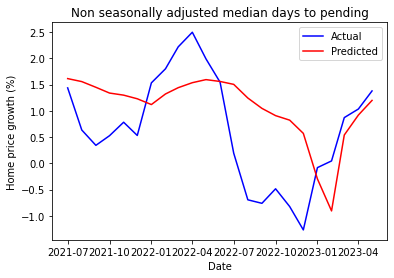

In [51]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted median days to pending')

In [52]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA median days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using median sale-to-list ratio

### Predictions when removing the seasonality

In [53]:
error = pd.read_csv('linear_regression/median_sale_to_list_ratio_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000062  0.007851  0.006956  1.767373  0.412418
1           1   -2  0.000081  0.008994  0.007933  2.560186  0.228789
2           2   -3  0.000098  0.009893  0.008584  3.009488  0.066974
3           3   -4  0.000104  0.010185  0.008979  3.019429  0.011078
4           4   -5  0.000101  0.010049  0.009060  2.984157  0.037196
5           5   -6  0.000095  0.009772  0.008862  3.045334  0.089629


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [54]:
(y, y_hat) = backtest('median_sale_to_list_ratio_raw', 2, ds_begin, ds_end, 36,True)

Text(0.5, 1.0, 'Seasonally adjusted median sale-to-list ratio')

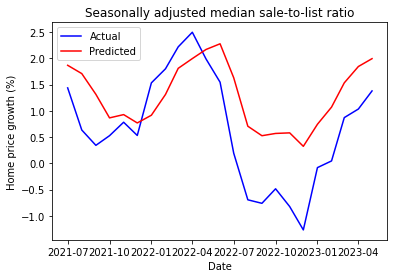

In [55]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted median sale-to-list ratio')

In [56]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA median sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [57]:
error = pd.read_csv('linear_regression/median_sale_to_list_ratio_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000118  0.010881  0.009285  1.774633 -0.128711
1           1   -2  0.000147  0.012108  0.010172  2.987732 -0.397685
2           2   -3  0.000154  0.012425  0.010573  3.406080 -0.471738
3           3   -4  0.000147  0.012144  0.010724  3.057148 -0.406027
4           4   -5  0.000133  0.011524  0.010100  2.804846 -0.266080
5           5   -6  0.000124  0.011134  0.009426  2.772974 -0.181833


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [58]:
(y, y_hat) = backtest('median_sale_to_list_ratio_raw', 2, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non seasonally adjusted median sale-to-list ratio')

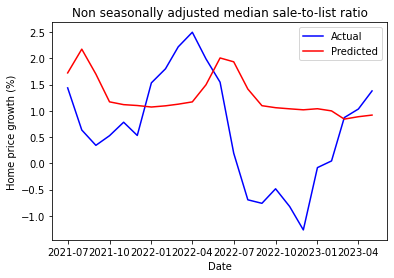

In [59]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted median sale-to-list ratio')

In [60]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA median sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using newly pending listings

### Predictions when removing the seasonality

In [61]:
error = pd.read_csv('linear_regression/newly_pending_listings_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000043  0.006549  0.005779  1.471906  0.591066
1           1   -2  0.000050  0.007060  0.006417  1.735187  0.524819
2           2   -3  0.000064  0.008003  0.007154  2.068594  0.389351
3           3   -4  0.000077  0.008755  0.007639  2.557395  0.269283
4           4   -5  0.000082  0.009057  0.007599  2.827453  0.217895
5           5   -6  0.000084  0.009148  0.007748  2.893591  0.202154


We get the best results for lag 1. Let us plot the predictions.

In [62]:
(y, y_hat) = backtest('newly_pending_listings_raw', 1, ds_begin, ds_end, 36, True)

Text(0.5, 1.0, 'Seasonally adjusted newly pending listings')

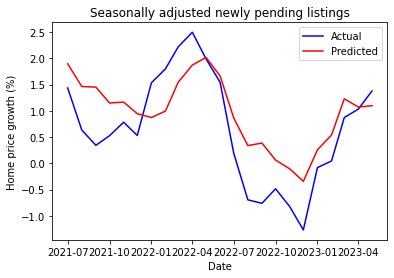

In [63]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted newly pending listings')

In [64]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA newly pending listings'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [65]:
error = pd.read_csv('linear_regression/newly_pending_listings_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000119  0.010889  0.009531  1.672775 -0.130332
1           1   -2  0.000139  0.011807  0.010333  2.403802 -0.328935
2           2   -3  0.000138  0.011755  0.009941  3.139528 -0.317411
3           3   -4  0.000131  0.011455  0.009811  3.266451 -0.250868
4           4   -5  0.000127  0.011254  0.009540  2.826127 -0.207417
5           5   -6  0.000126  0.011209  0.009058  2.486893 -0.197769


We get the best results for lag 1. Let us plot the predictions.

In [66]:
(y, y_hat) = backtest('newly_pending_listings_raw', 1, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non seasonally adjusted newly pending listings')

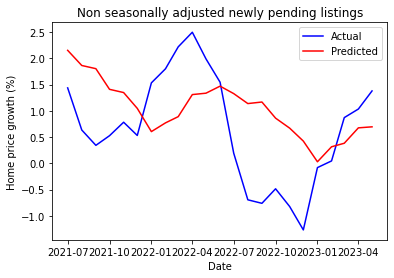

In [67]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted newly pending listings')

In [68]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA newly pending listings'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using percentage of listings with price cut

### Predictions when removing the seasonality

In [69]:
error = pd.read_csv('linear_regression/pct_listings_price_cut_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000010  0.003236  0.002510  0.381913  0.900160
1           1   -2  0.000015  0.003876  0.003334  0.968033  0.856742
2           2   -3  0.000022  0.004704  0.003834  0.786693  0.789060
3           3   -4  0.000035  0.005929  0.004984  1.012835  0.664840
4           4   -5  0.000057  0.007541  0.006399  1.561789  0.457839
5           5   -6  0.000082  0.009032  0.007507  2.168493  0.222249


We get the best results for lag 1. Let us plot the predictions.

In [105]:
(y, y_hat) = backtest('pct_listings_price_cut_raw', 1, ds_begin, ds_end, 36, True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


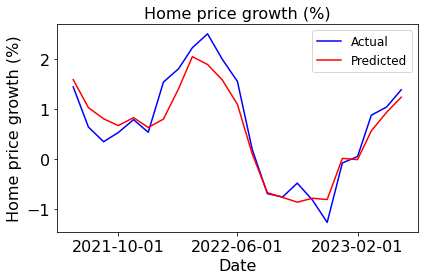

In [114]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2021, 10, 1), datetime(2022, 6, 1), datetime(2023, 2, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/linear_regression.eps', format='eps')
plt.show()

In [72]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA pct listings with price cut'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [73]:
error = pd.read_csv('linear_regression/pct_listings_price_cut_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000022  0.004741  0.003848  0.796023  0.785715
1           1   -2  0.000025  0.004966  0.004311  1.411279  0.764937
2           2   -3  0.000054  0.007332  0.006051  1.807204  0.487560
3           3   -4  0.000102  0.010122  0.008894  2.138959  0.023338
4           4   -5  0.000150  0.012259  0.010359  1.650014 -0.432747
5           5   -6  0.000179  0.013365  0.011020  3.132868 -0.702932


We get the best results for lag 1. Let us plot the predictions.

In [74]:
(y, y_hat) = backtest('pct_listings_price_cut_raw', 1, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non seasonally adjusted pct listings with price cut')

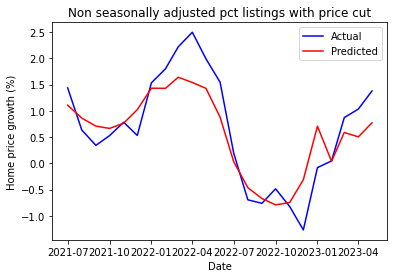

In [75]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted pct listings with price cut')

In [76]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA pct listings with price cut'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using percentage sold above list price

### Predictions when removing the seasonality

In [77]:
error = pd.read_csv('linear_regression/pct_sold_above_list_price_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000070  0.008364  0.007355  2.185293  0.333136
1           1   -2  0.000087  0.009331  0.008333  2.600271  0.169926
2           2   -3  0.000099  0.009961  0.008938  2.918754  0.054070
3           3   -4  0.000105  0.010269  0.009239  3.150132 -0.005385
4           4   -5  0.000106  0.010298  0.009285  3.244884 -0.011001
5           5   -6  0.000102  0.010078  0.009100  3.093274  0.031767


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [78]:
(y, y_hat) = backtest('pct_sold_above_list_price_raw', 2, ds_begin, ds_end, 36, True)

Text(0.5, 1.0, 'Seasonally adjusted pct sold above list price')

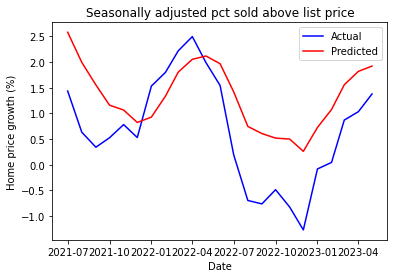

In [79]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted pct sold above list price')

In [80]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA pct sold above list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [81]:
error = pd.read_csv('linear_regression/pct_sold_above_list_price_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000134  0.011570  0.009988  2.118743 -0.276228
1           1   -2  0.000158  0.012580  0.010820  2.853128 -0.508798
2           2   -3  0.000160  0.012659  0.010894  3.254205 -0.527818
3           3   -4  0.000149  0.012198  0.010723  3.402570 -0.418546
4           4   -5  0.000136  0.011666  0.010296  3.250862 -0.297362
5           5   -6  0.000130  0.011419  0.009841  2.812459 -0.243146


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [82]:
(y, y_hat) = backtest('pct_sold_above_list_price_raw', 2, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non seasonally adjusted pct sold above list price')

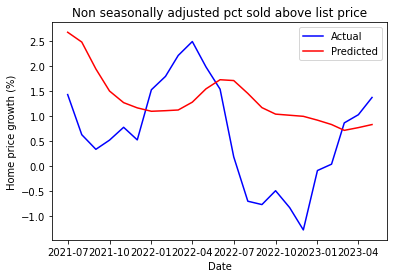

In [83]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted pct sold above list price')

In [84]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA pct sold above list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using percentage sold below list price

### Predictions when removing the seasonality

In [85]:
error = pd.read_csv('linear_regression/pct_sold_below_list_price_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000069  0.008335  0.007335  2.162647  0.337668
1           1   -2  0.000085  0.009194  0.008202  2.572581  0.194132
2           2   -3  0.000096  0.009823  0.008814  2.897828  0.080084
3           3   -4  0.000104  0.010190  0.009165  3.133274  0.009990
4           4   -5  0.000105  0.010261  0.009249  3.214714 -0.003711
5           5   -6  0.000101  0.010064  0.009073  3.053762  0.034353


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [86]:
(y, y_hat) = backtest('pct_sold_below_list_price_raw', 2, ds_begin, ds_end, 36, True)

Text(0.5, 1.0, 'Seasonally adjusted pct sold below list price')

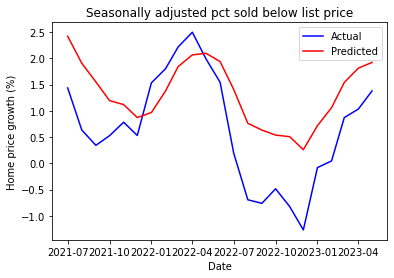

In [87]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted pct sold below list price')

In [88]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA pct sold below list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [89]:
error = pd.read_csv('linear_regression/pct_sold_below_list_price_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000135  0.011616  0.010032  2.154066 -0.286318
1           1   -2  0.000154  0.012427  0.010662  2.867090 -0.472303
2           2   -3  0.000155  0.012442  0.010704  3.228273 -0.475819
3           3   -4  0.000145  0.012039  0.010559  3.324729 -0.381786
4           4   -5  0.000134  0.011560  0.010119  3.122937 -0.274062
5           5   -6  0.000128  0.011330  0.009649  2.711396 -0.223704


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [90]:
(y, y_hat) = backtest('pct_sold_below_list_price_raw', 2, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non seasonally adjusted pct sold below list price')

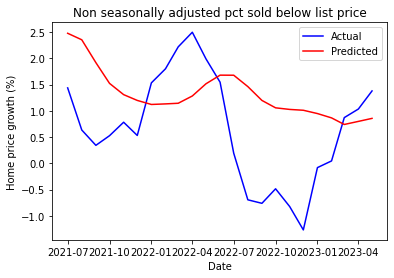

In [91]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted pct sold below list price')

In [92]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA pct sold below list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Conclusion

In [93]:
errors = pd.concat(errors)
errors.to_csv('linear_regression/errors.csv')